<a href="https://colab.research.google.com/github/wanjiku-wairimu1/Deep-Learning/blob/ImageClassification/Copy_of_CNN_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from keras.preprocessing.image import ImageDataGenerator # Represent the image in matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Def height and width of the image
img_width, img_height = 224, 224

In [31]:
import os
train_data_dir = os.path.join("/content/drive/MyDrive/v_data/train")
test_data_dir = os.path.join("/content/drive/MyDrive/v_data/test")

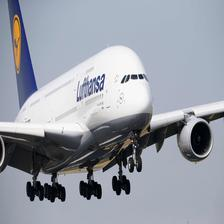

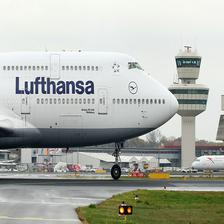

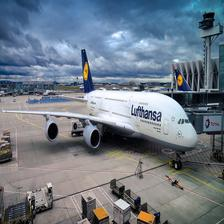

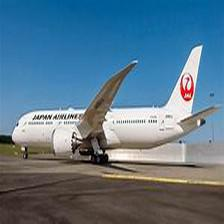

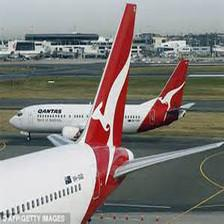

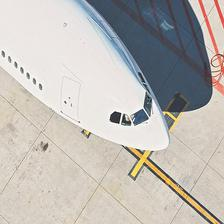

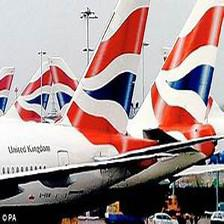

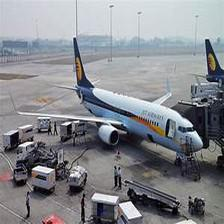

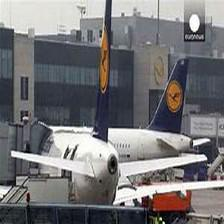

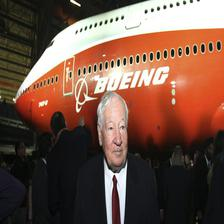

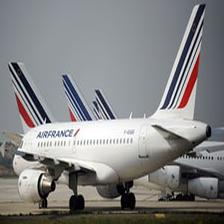

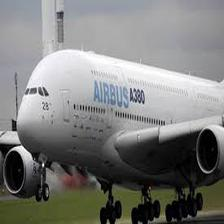

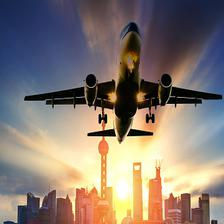

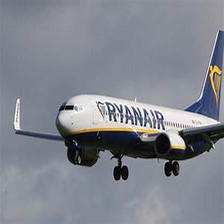

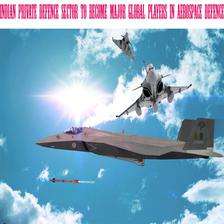

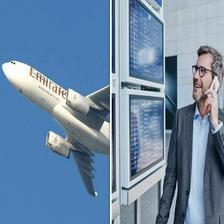

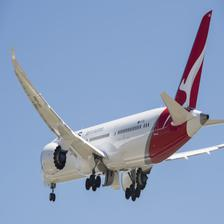

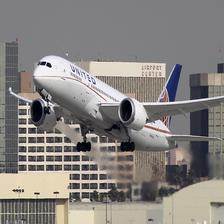

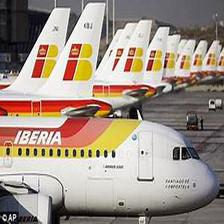

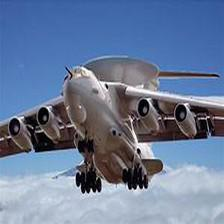

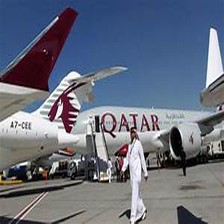

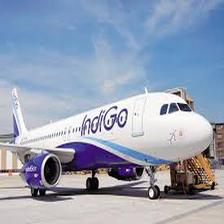

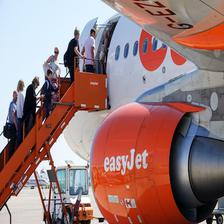

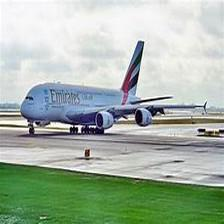

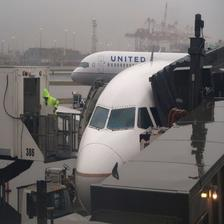

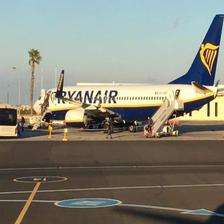

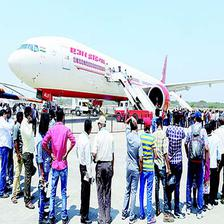

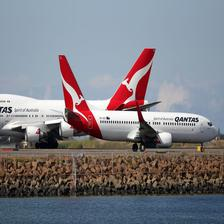

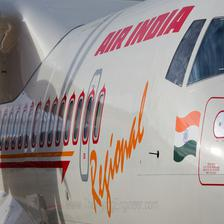

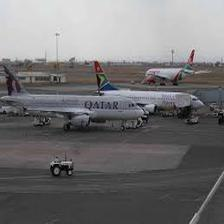

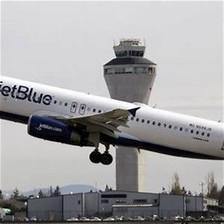

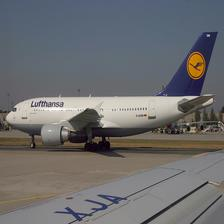

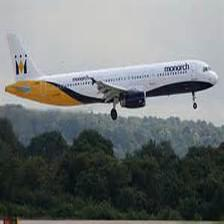

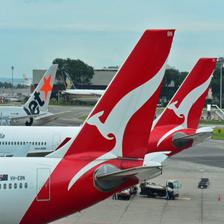

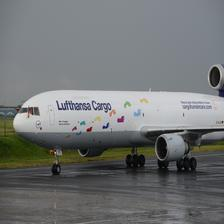

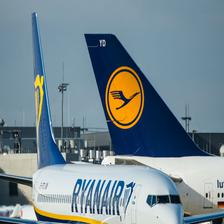

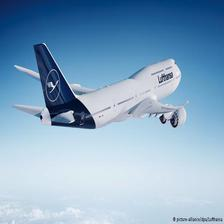

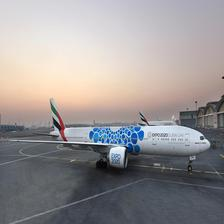

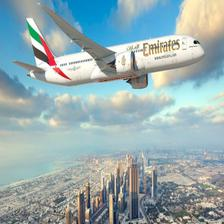

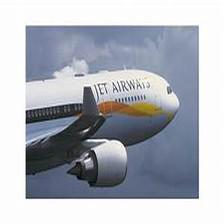

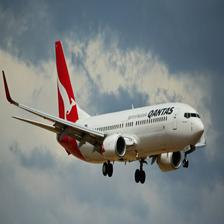

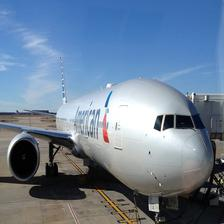

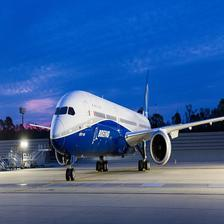

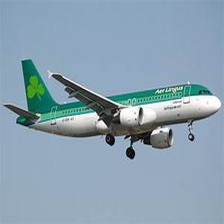

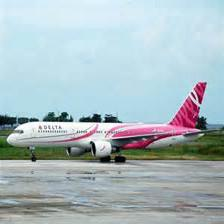

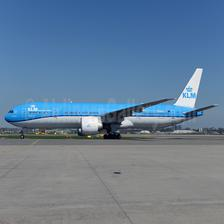

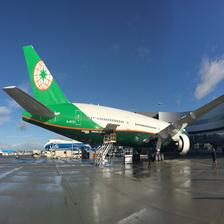

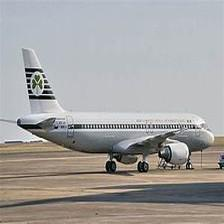

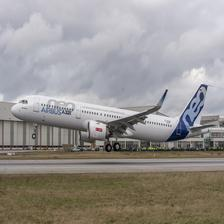

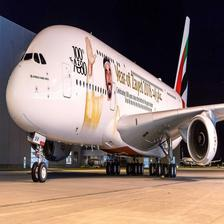

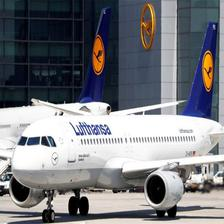

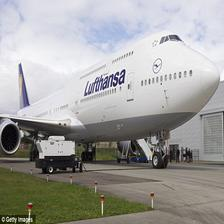

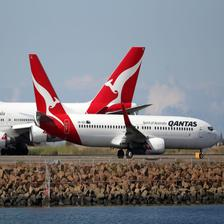

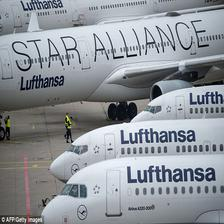

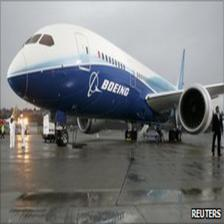

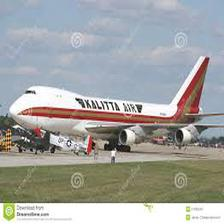

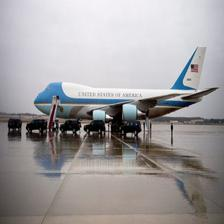

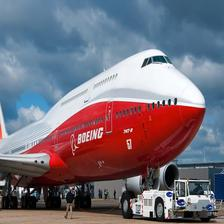

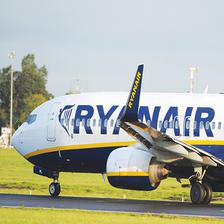

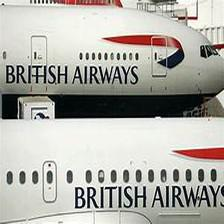

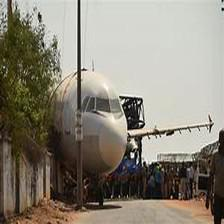

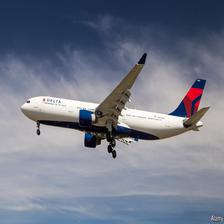

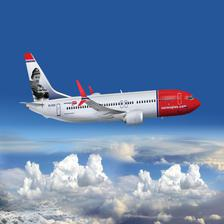

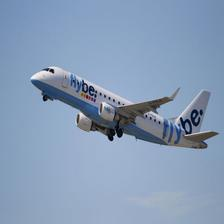

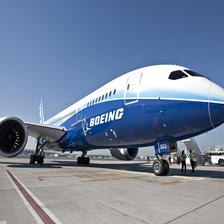

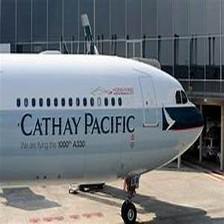

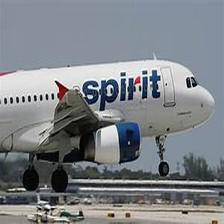

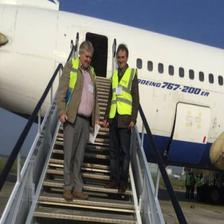

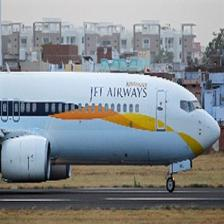

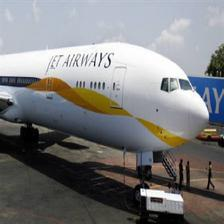

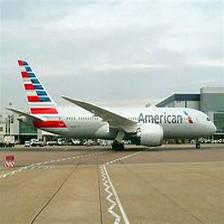

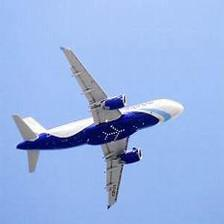

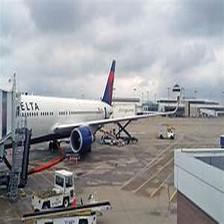

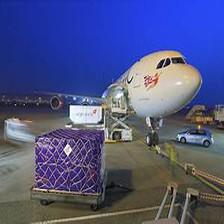

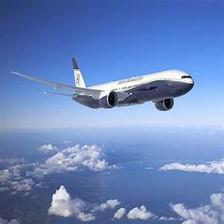

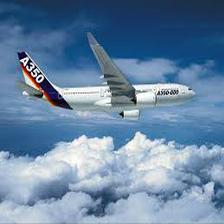

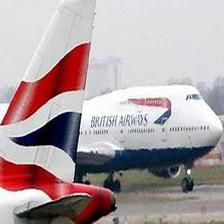

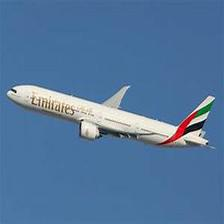

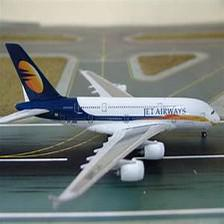

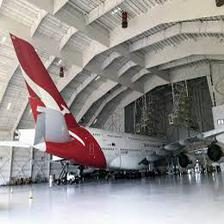

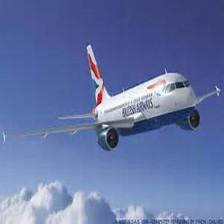

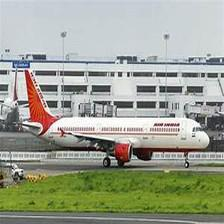

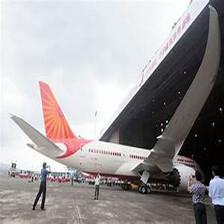

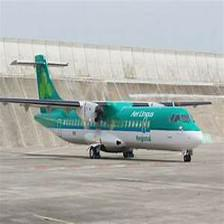

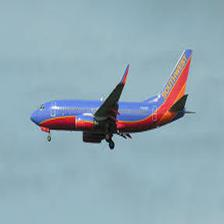

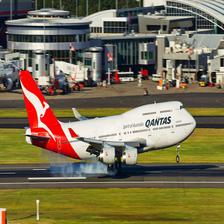

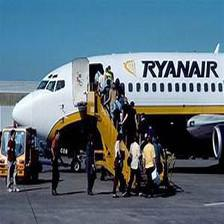

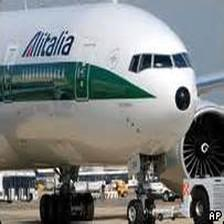

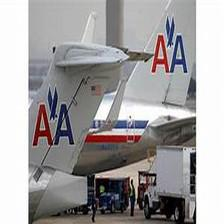

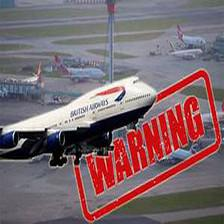

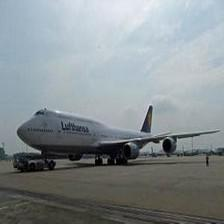

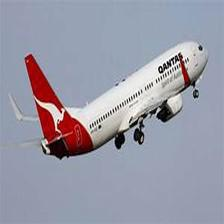

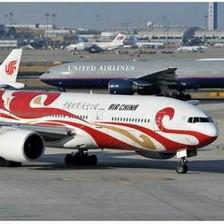

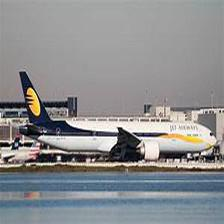

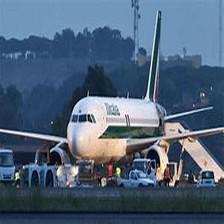

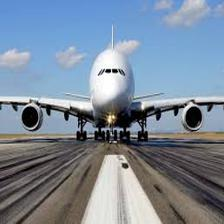

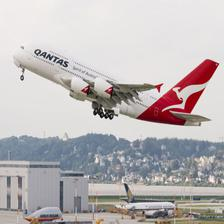

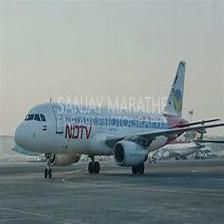

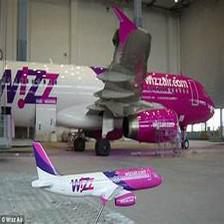

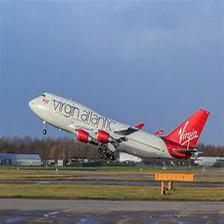

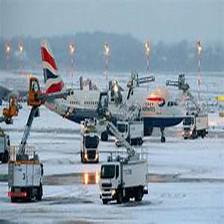

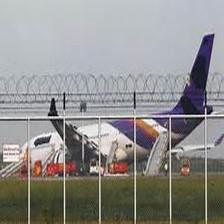

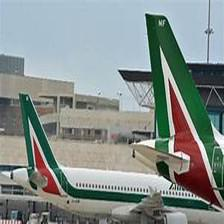

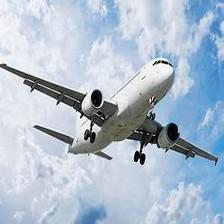

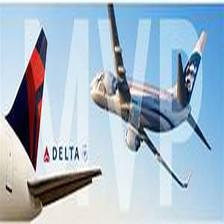

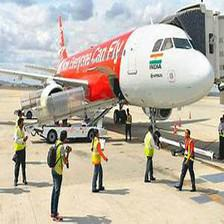

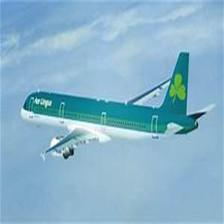

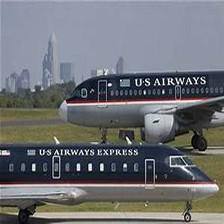

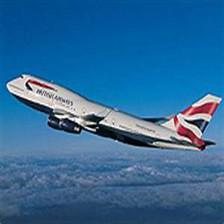

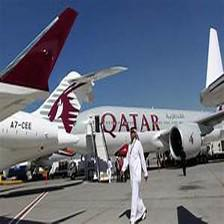

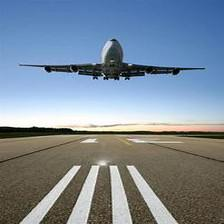

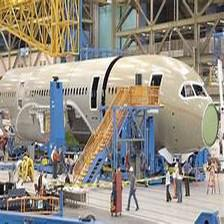

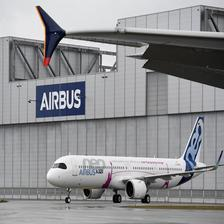

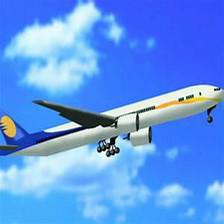

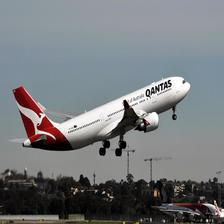

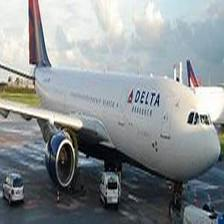

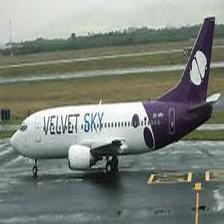

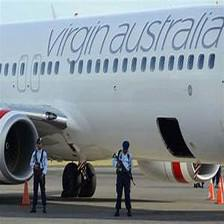

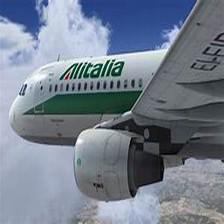

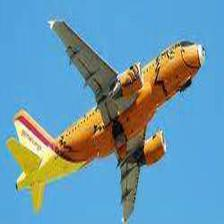

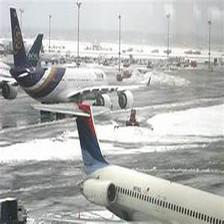

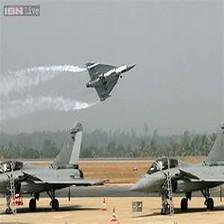

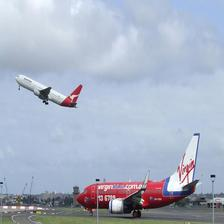

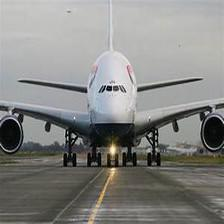

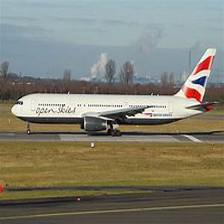

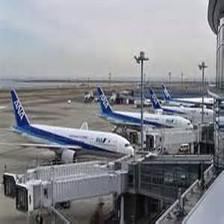

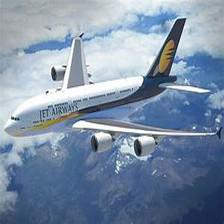

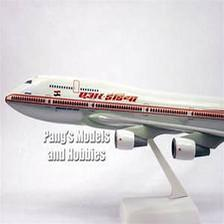

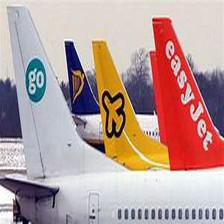

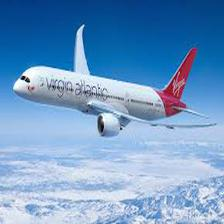

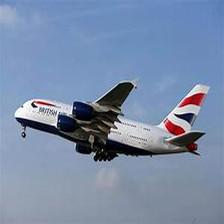

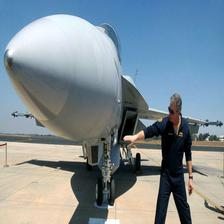

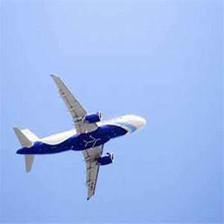

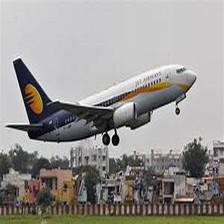

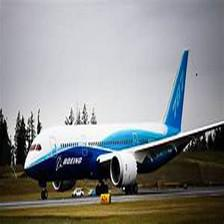

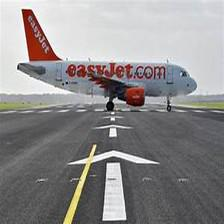

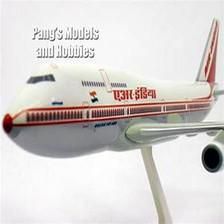

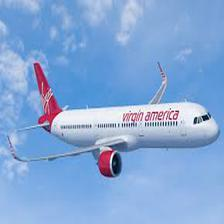

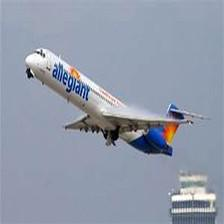

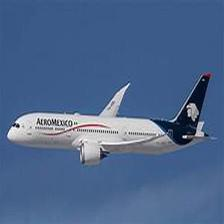

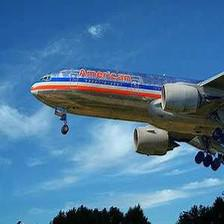

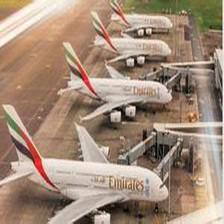

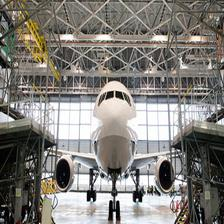

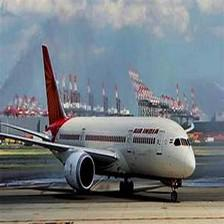

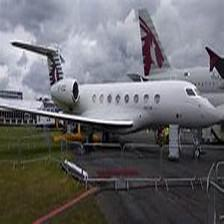

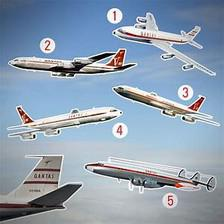

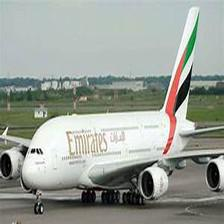

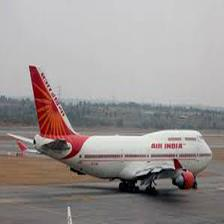

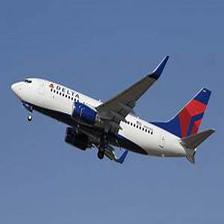

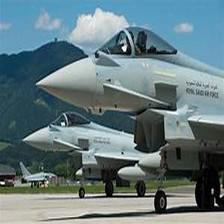

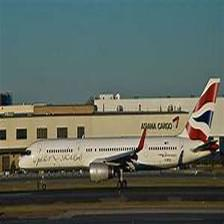

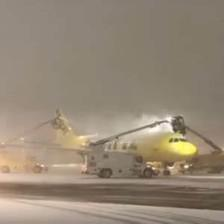

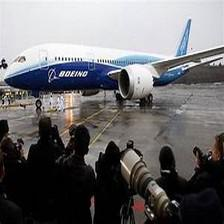

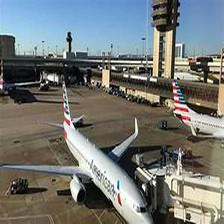

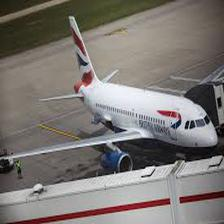

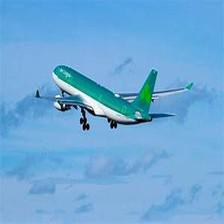

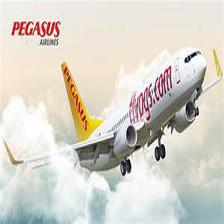

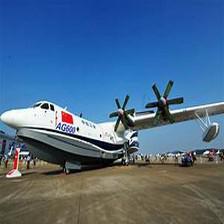

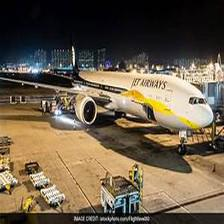

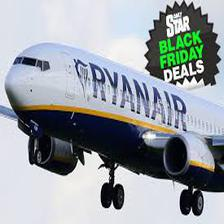

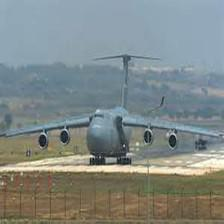

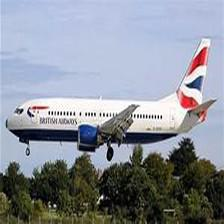

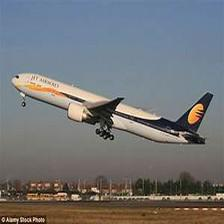

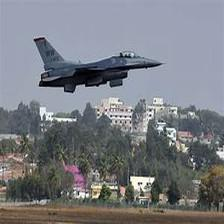

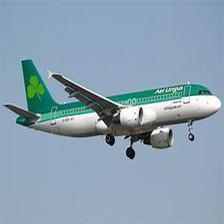

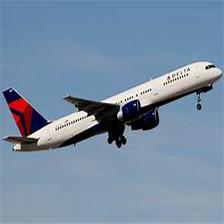

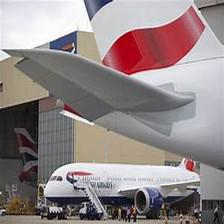

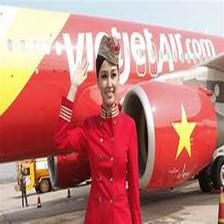

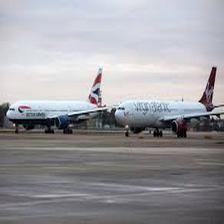

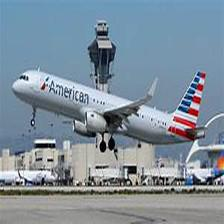

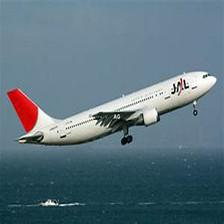

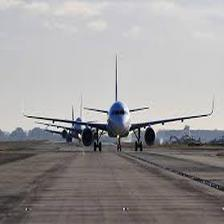

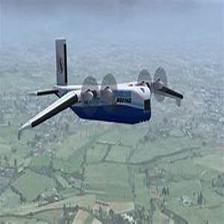

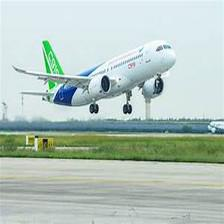

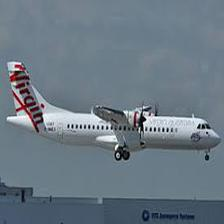

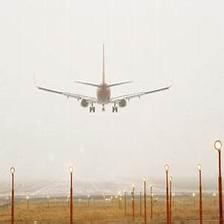

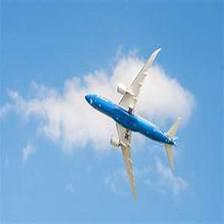

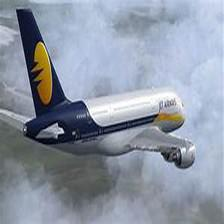

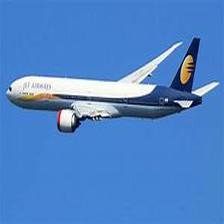

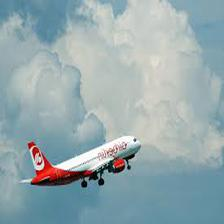

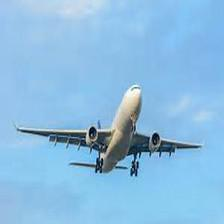

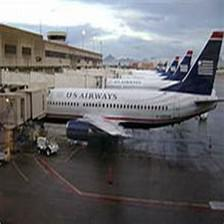

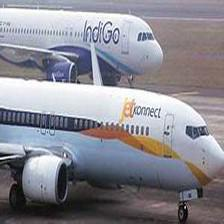

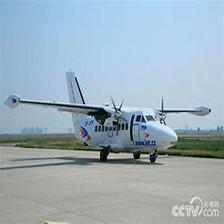

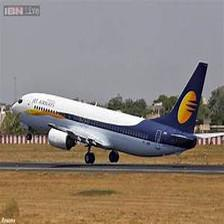

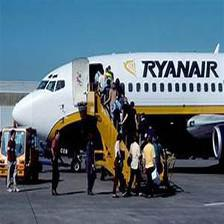

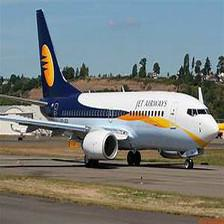

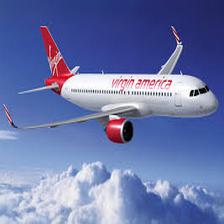

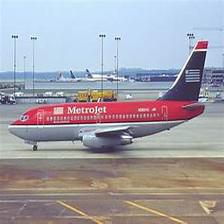

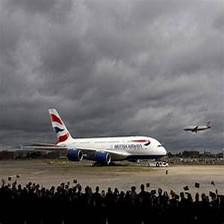

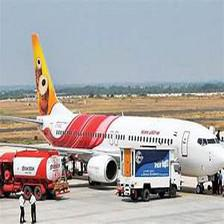

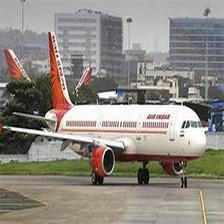

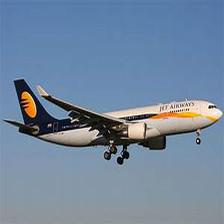

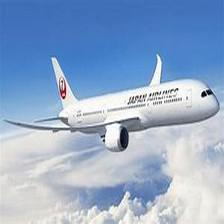

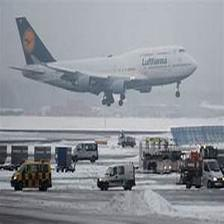

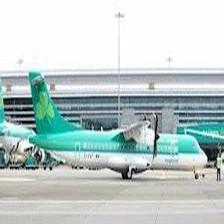

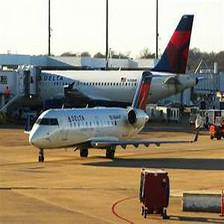

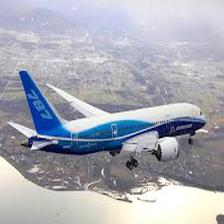

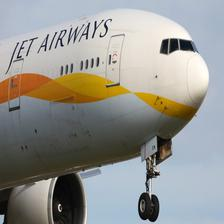

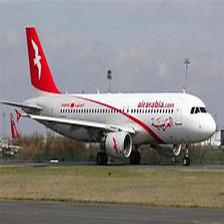

In [32]:
# see the images
import glob
from IPython.display import Image, display
for imageName in glob.glob("/content/drive/MyDrive/v_data/train/planes/*"):
       display(Image(filename=imageName))

In [33]:
# Channel First or Last
if backend.image_data_format() == 'channel_first':
        input_shape = (3, img_width, img_height)
else:
        input_shape = (img_width, img_height, 3)



# Create CNN - Convolutional neural nets
model = Sequential()
# input layer
model.add(Conv2D(32, (5,5), input_shape = input_shape))
model.add(Activation('relu'))
# apply maxpooling to the image/padding
model.add(MaxPooling2D(pool_size=(2,2)))
 

# 1st Hiden layer
model.add(Conv2D(64, (5,5)))
model.add(Activation('relu'))
# apply maxpooling to the image/padding
model.add(MaxPooling2D(pool_size=(2,2)))
 

# 2nd Hiden layer
model.add(Conv2D(128, (7,7)))
model.add(Activation('relu'))
# apply maxpooling to the image/padding
model.add(MaxPooling2D(pool_size=(2,2)))
 

# 3rd hidden
# Flattening - reduces matrix into a column like
# Flattening makes it possible to applythe normal ANN
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
 

model.add(Dense(64))
model.add(Activation('sigmoid'))
 

# output layer
model.add(Dense(1))
 

!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz
ann_viz(model, view = True, title = "CNN Graph", filename = "cnn.gv")
# Image processing
# Convolational  Neural Networks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
# Modcom
from keras.preprocessing.image import ImageDataGenerator # Represent the image in matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

In [35]:
# Def height and width of the image
img_width, img_height = 224, 224

In [36]:
import os
train_data_dir = os.path.join("/content/drive/MyDrive/v_data/train")
test_data_dir = os.path.join("/content/drive/MyDrive/v_data/test")

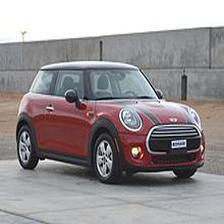

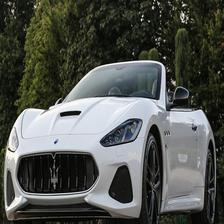

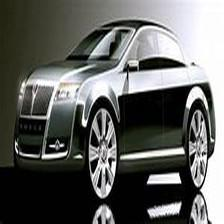

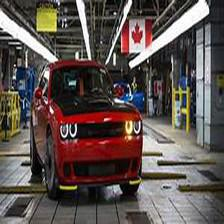

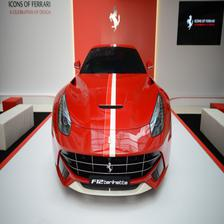

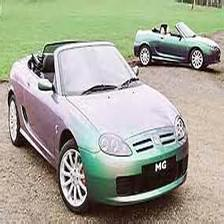

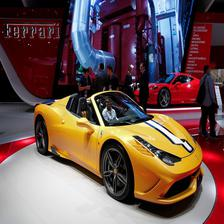

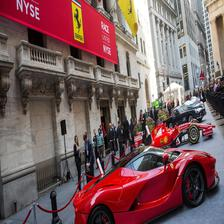

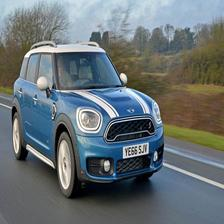

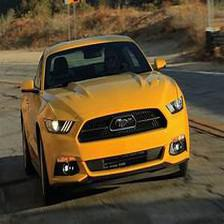

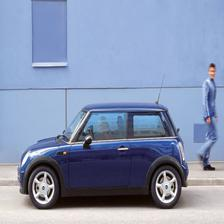

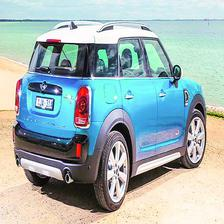

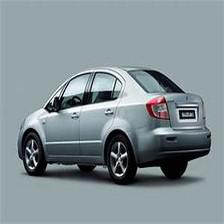

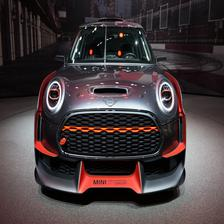

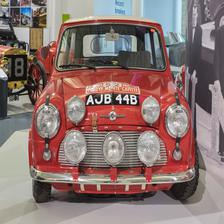

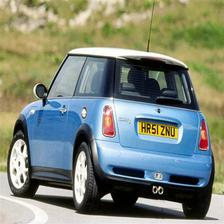

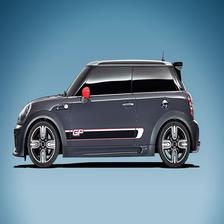

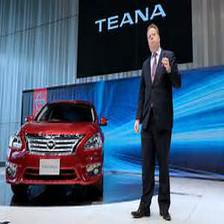

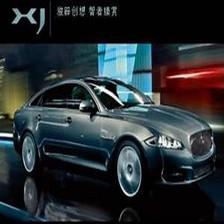

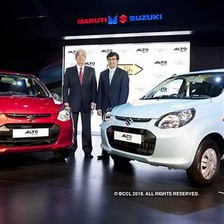

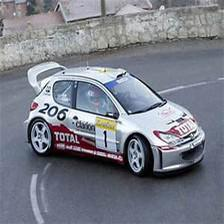

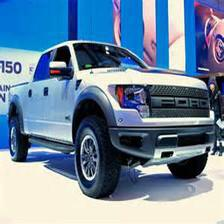

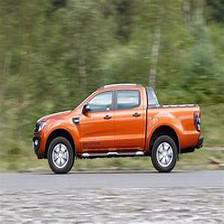

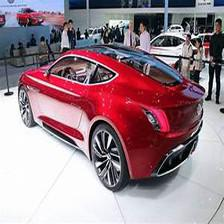

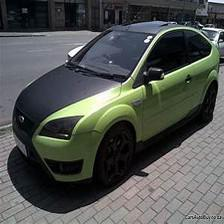

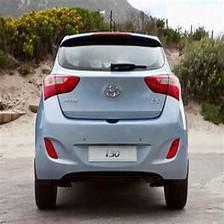

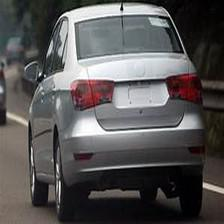

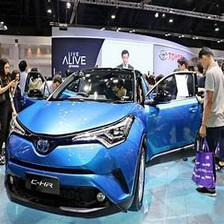

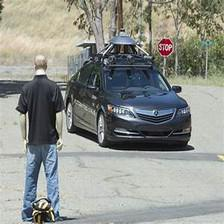

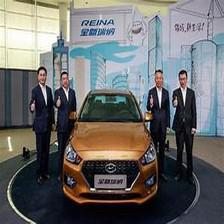

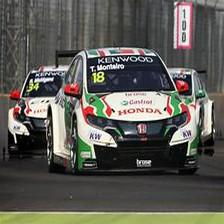

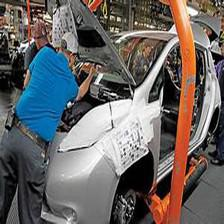

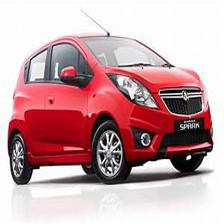

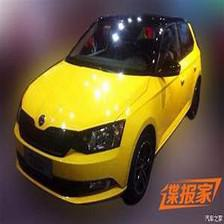

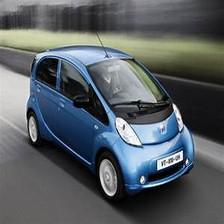

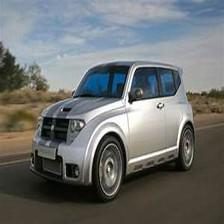

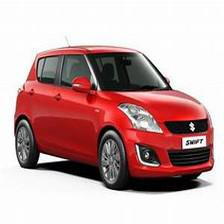

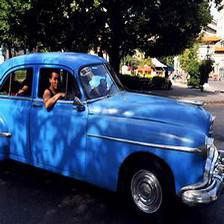

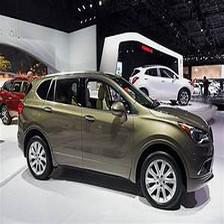

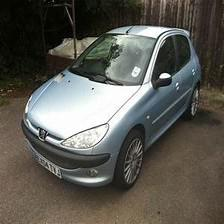

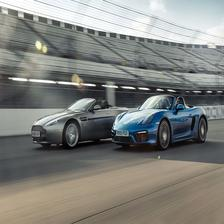

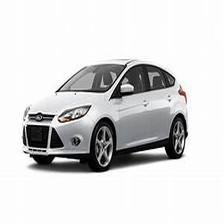

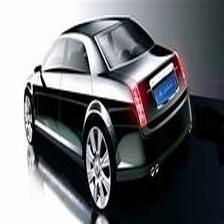

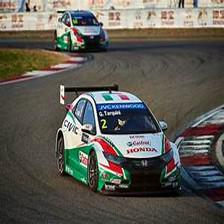

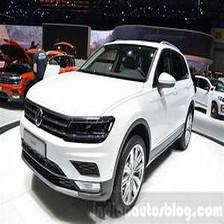

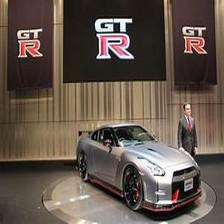

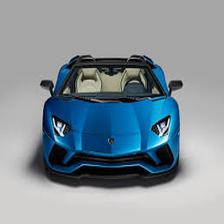

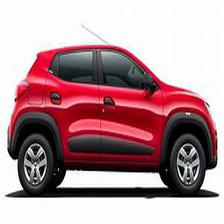

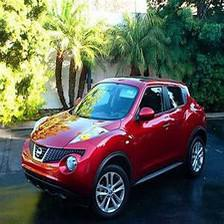

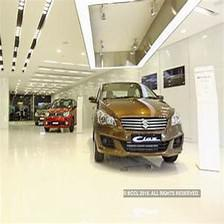

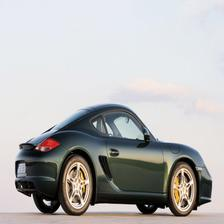

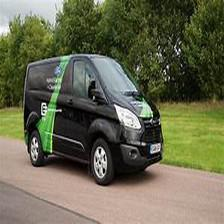

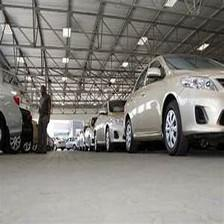

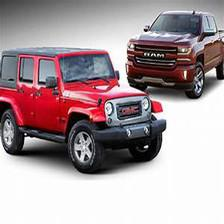

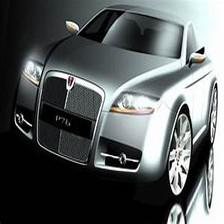

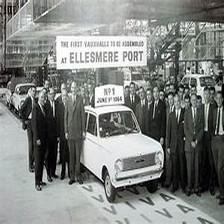

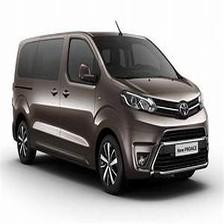

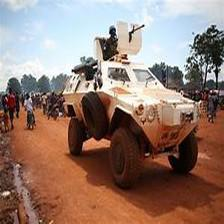

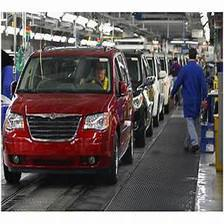

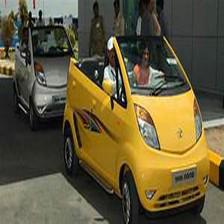

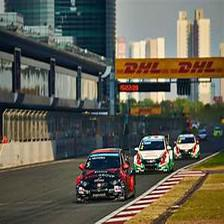

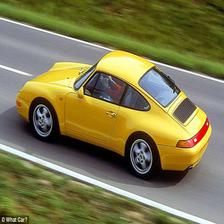

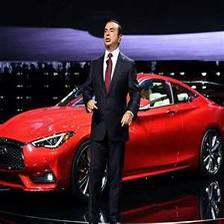

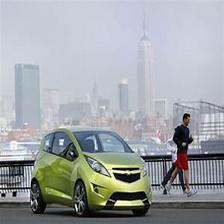

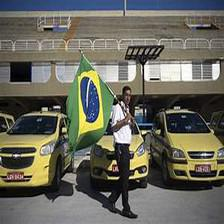

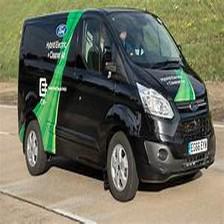

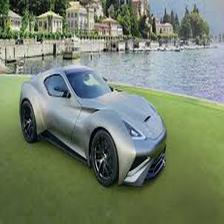

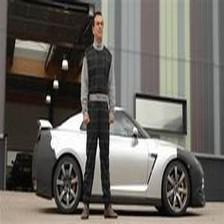

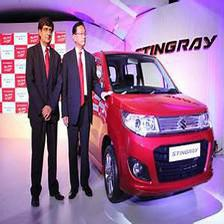

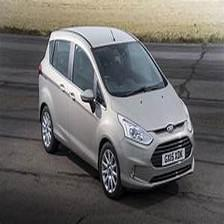

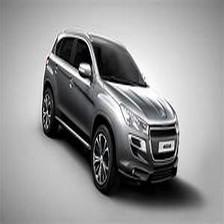

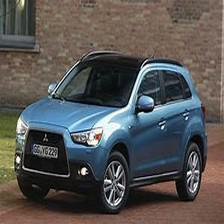

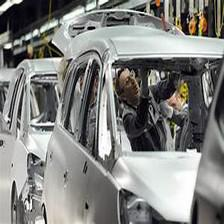

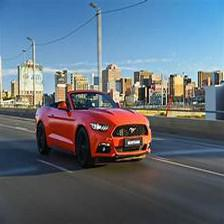

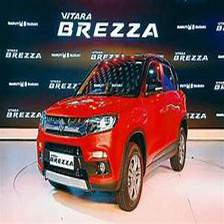

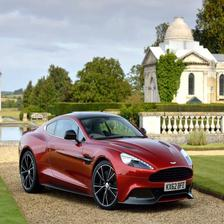

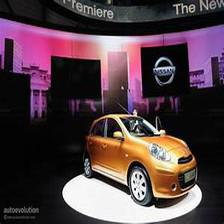

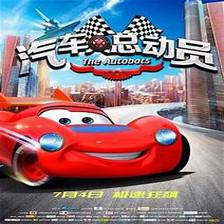

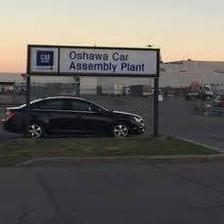

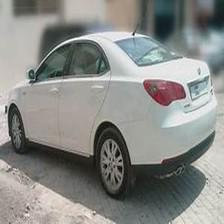

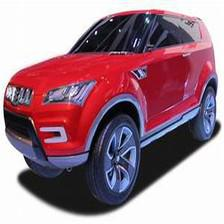

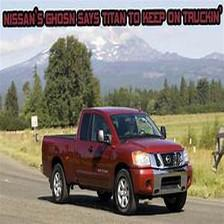

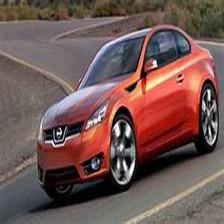

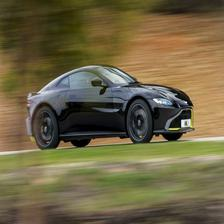

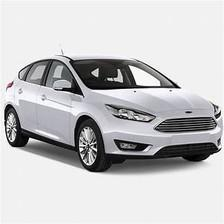

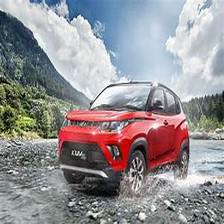

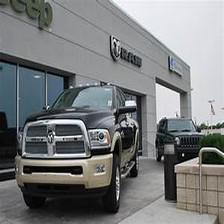

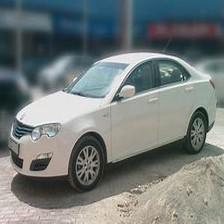

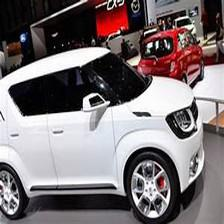

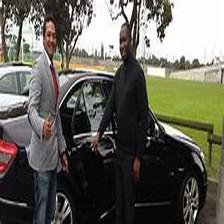

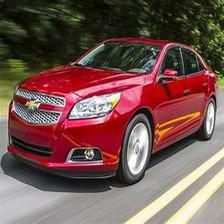

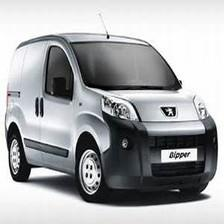

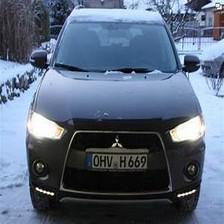

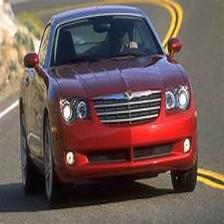

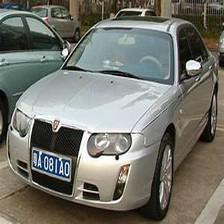

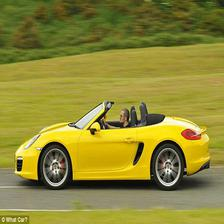

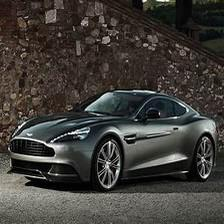

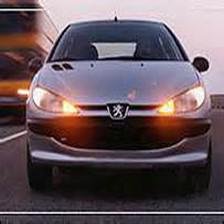

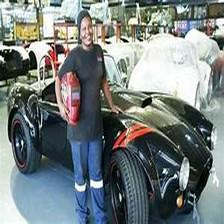

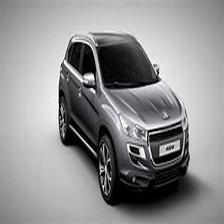

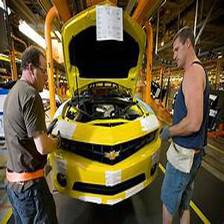

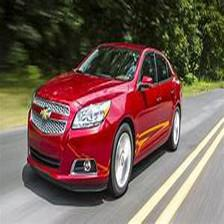

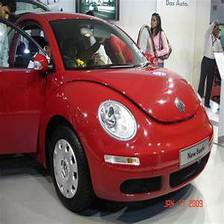

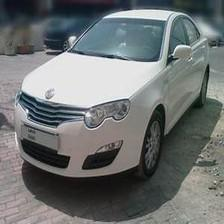

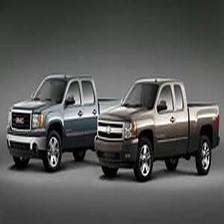

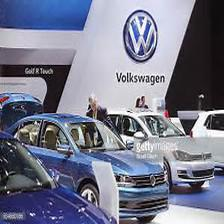

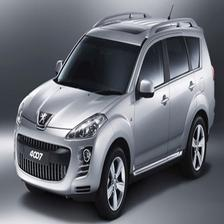

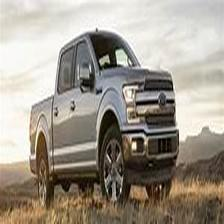

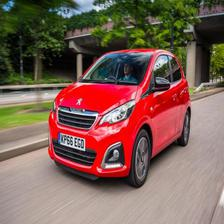

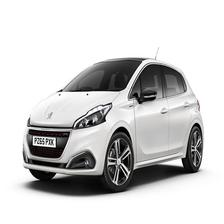

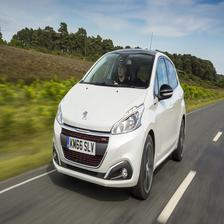

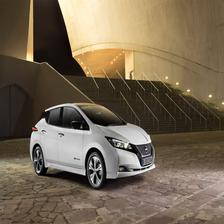

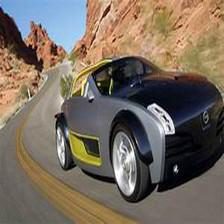

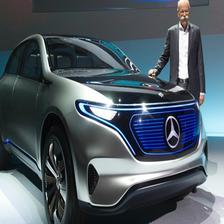

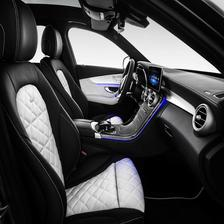

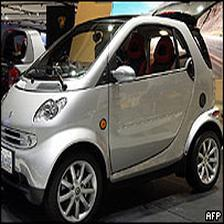

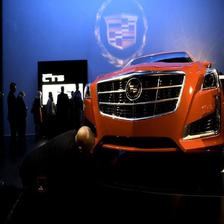

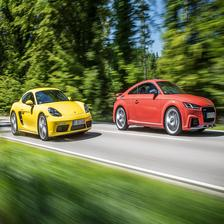

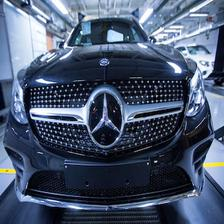

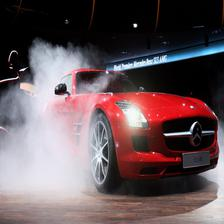

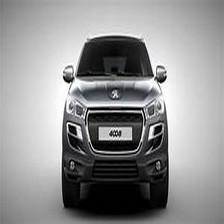

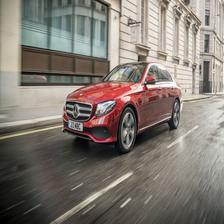

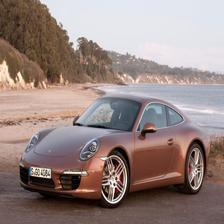

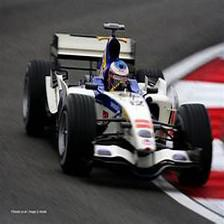

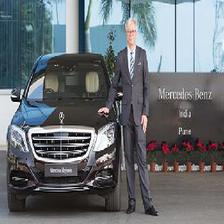

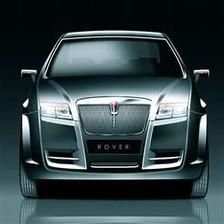

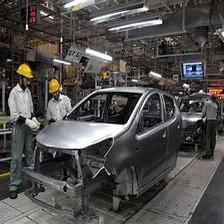

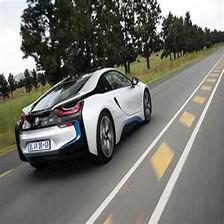

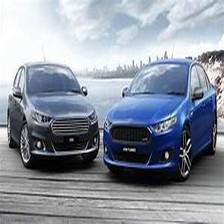

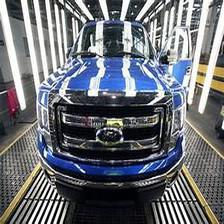

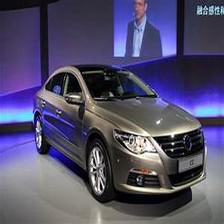

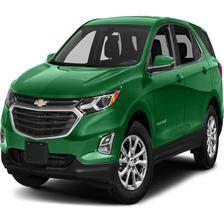

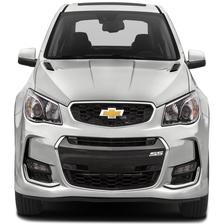

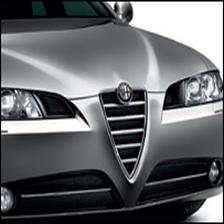

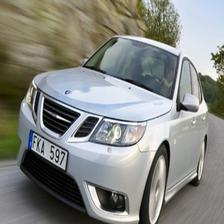

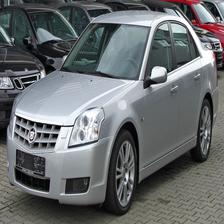

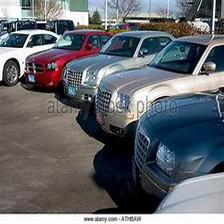

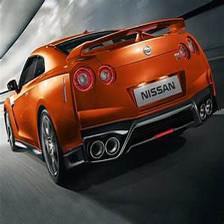

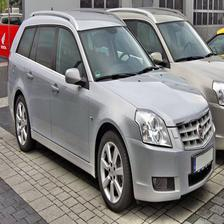

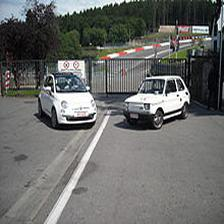

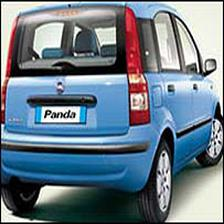

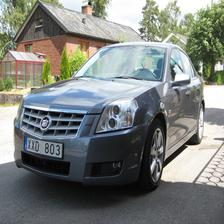

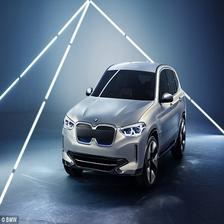

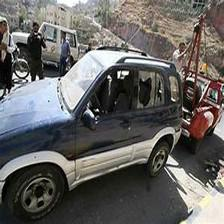

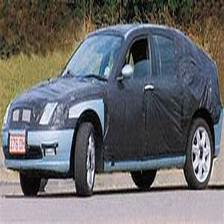

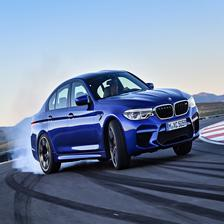

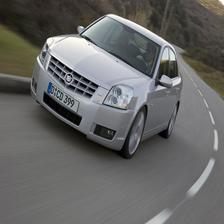

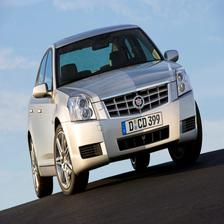

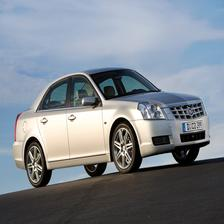

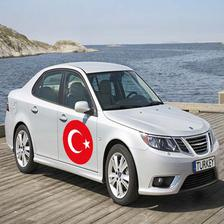

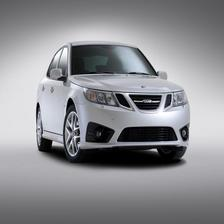

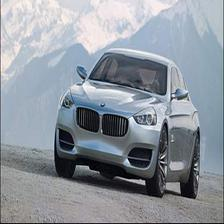

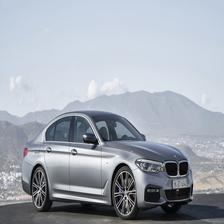

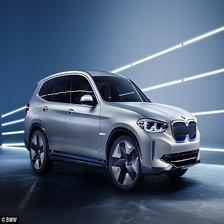

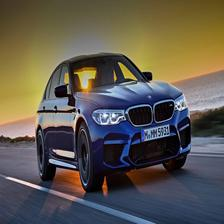

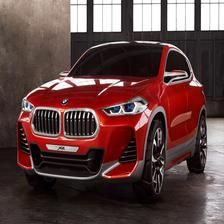

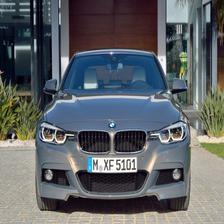

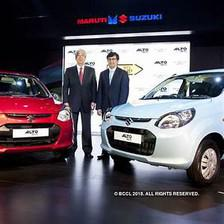

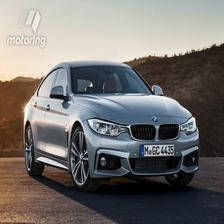

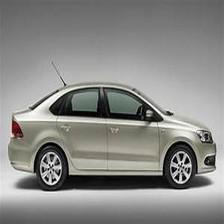

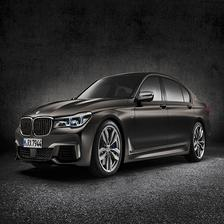

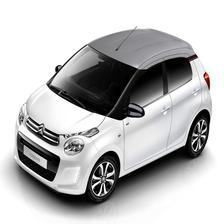

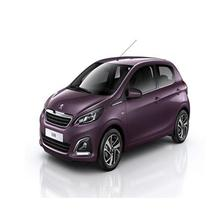

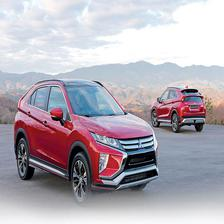

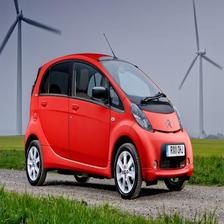

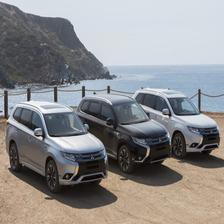

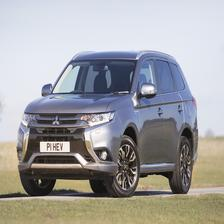

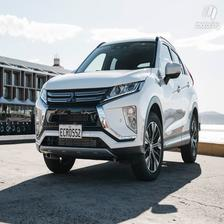

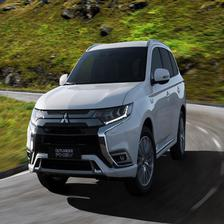

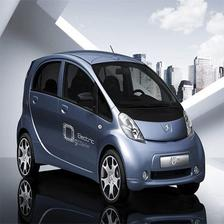

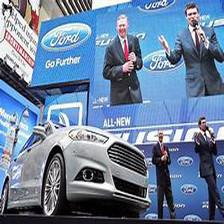

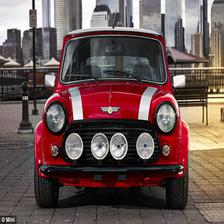

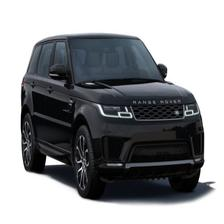

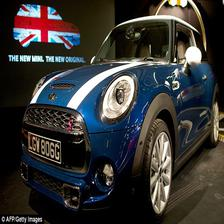

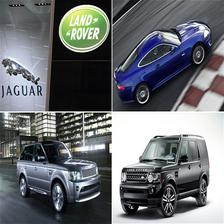

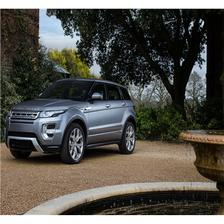

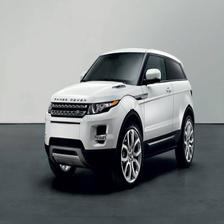

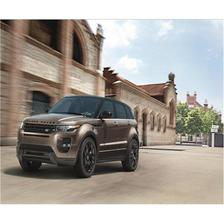

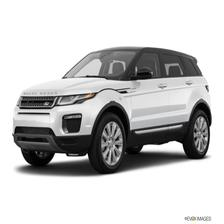

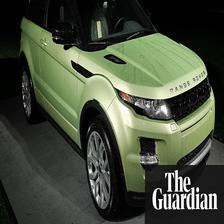

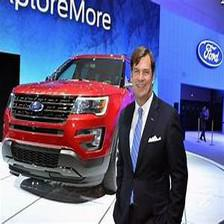

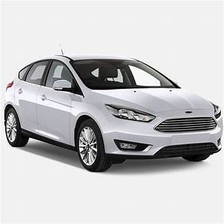

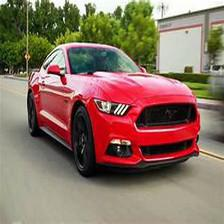

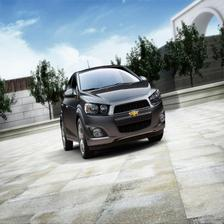

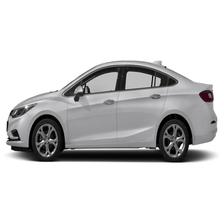

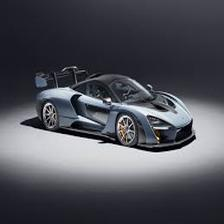

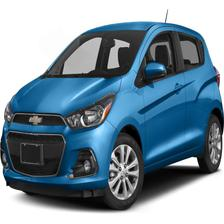

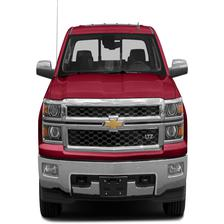

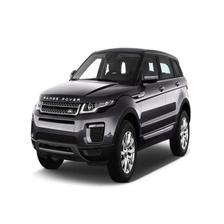

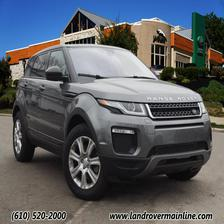

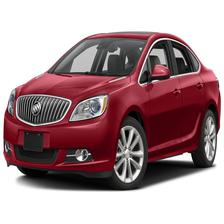

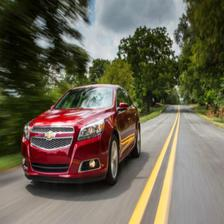

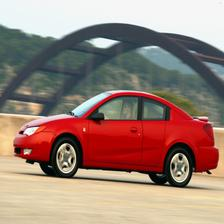

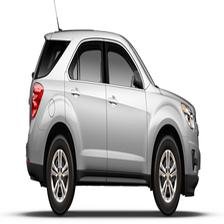

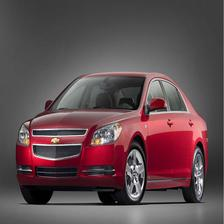

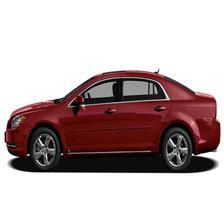

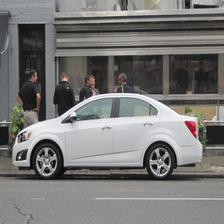

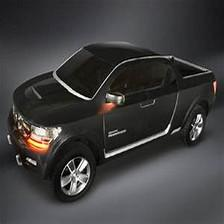

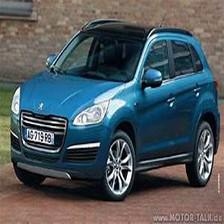

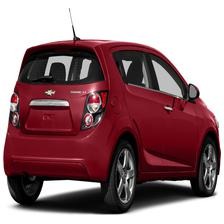

In [37]:
# see the images
import glob
from IPython.display import Image, display
for imageName in glob.glob("/content/drive/MyDrive/v_data/train/cars/*"):
       display(Image(filename=imageName))

In [38]:
# Channel First or Last
if backend.image_data_format() == 'channel_first':
        input_shape = (3, img_width, img_height)
else:
        input_shape = (img_width, img_height, 3)

# Create CNN - Convolutional neural nets
model = Sequential()
# input layer
model.add(Conv2D(32, (2,2), input_shape = input_shape))
model.add(Activation('relu'))
# apply maxpooling to the image/padding
model.add(MaxPooling2D(pool_size=(2,2)))
 


# 1st Hiden layer
model.add(Conv2D(32, (2,2)))
model.add(Activation('relu'))
# apply maxpooling to the image/padding
model.add(MaxPooling2D(pool_size=(2,2)))
 


# 2nd Hiden layer
model.add(Conv2D(64, (2,2)))
model.add(Activation('relu'))
# apply maxpooling to the image/padding
model.add(MaxPooling2D(pool_size=(2,2)))
 

# Flattening - reduces matrix into a column like
# Flattening makes it possible to applythe normal ANN
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
 

model.add(Dropout(0.5))
# output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz
ann_viz(model, view = True, title = "CNN Graph", filename = "cnn.gv")
# Image processing
# Convolational Neural Networks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
# Compile 
#  2 Classes  - binary_crossentropy
#  3 or more :  category_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [40]:
# Ways of avoiding overfitting
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss',
mode = 'min',
patience = 10,
restore_best_weights=True)
 

# Model Check point - stores the the model after each epoch.
from keras.callbacks import ModelCheckpoint
stored_model = "imagebest.hdf5"
checkpoint = ModelCheckpoint(stored_model,
monitor="loss",
verbose=1,
save_best_only=True,
mode = 'min')

In [41]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip=True
)

test_datagen = ImageDataGenerator(
rescale = 1./255
)

# generate the real image data using above functions
train = train_datagen.flow_from_directory(train_data_dir,
target_size=(img_width, img_height),
batch_size = 64,
class_mode = 'binary')
 


test = test_datagen.flow_from_directory(test_data_dir,
target_size=(img_width, img_height),
batch_size = 64,
class_mode = 'binary')

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [43]:
# Fit the model with data
model.fit(train, epochs = 10, batch_size=64, validation_data=test, callbacks = [es, checkpoint])

Epoch 1/10
7/7 [==============================] - ETA: 0s - loss: 0.4179 - accuracy: 0.8350
Epoch 1: loss improved from 0.53294 to 0.41787, saving model to imagebest.hdf5
7/7 [==============================] - 25s 4s/step - loss: 0.4179 - accuracy: 0.8350 - val_loss: 0.2361 - val_accuracy: 0.9200
Epoch 2/10
7/7 [==============================] - ETA: 0s - loss: 0.3754 - accuracy: 0.8475
Epoch 2: loss improved from 0.41787 to 0.37538, saving model to imagebest.hdf5
7/7 [==============================] - 25s 4s/step - loss: 0.3754 - accuracy: 0.8475 - val_loss: 0.2787 - val_accuracy: 0.8900
Epoch 3/10
7/7 [==============================] - ETA: 0s - loss: 0.3247 - accuracy: 0.8575
Epoch 3: loss improved from 0.37538 to 0.32469, saving model to imagebest.hdf5
7/7 [==============================] - 28s 4s/step - loss: 0.3247 - accuracy: 0.8575 - val_loss: 0.2668 - val_accuracy: 0.9100
Epoch 4/10
7/7 [==============================] - ETA: 0s - loss: 0.2797 - accuracy: 0.8750
Epoch 4: loss 

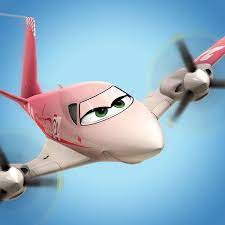

1/1 [==============================] - 0s 111ms/step
Predicted  0.99493176
Its a Plane


In [46]:
# Lets get new images and see if model can predict
from keras.models import load_model
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array

# Load model
model = load_model("imagebest.hdf5")
img_path = "Plane1.jpg"
image = load_img(img_path, target_size = (224,224))

# convert this image to matrix/array
converted_image = img_to_array(image)
# Rescale
converted_image = converted_image/255.0
converted_image = converted_image.reshape(1, 224, 224, 3) # batch, width, height, channel
# 0 - Cars
# 1 - Planes
# see the images
import glob
from IPython.display import Image, display
for imageName in glob.glob(img_path):
 display(Image(filename=imageName))

label = model.predict(converted_image)
print("Predicted ", label[0][0])
if label[0][0] < 0.5:
     print("Its a Car")
elif label[0][0] > 0.5:
     print("Its a Plane")
else:
     print("Its Unknown")